In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import shutil
import tensorflow as tf
import PIL.Image as Image
from tensorflow import keras
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications import *
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn import model_selection
from tqdm import tqdm
from tensorflow.keras import optimizers

In [2]:
input_shape=(260,260,3)
conv_base = EfficientNetB2(weights="imagenet", include_top=False, input_shape=input_shape)

In [3]:
labels=os.listdir(r'C:\Users\Aditi\Desktop\Projects\Retinal Disease Detection\Training')
print(labels)

['Bietti crystalline dystrophy', 'Blur fundus with suspected PDR', 'Blur fundus without PDR', 'BRVO', 'Chorioretinal atrophy-coloboma', 'Congenital disc abnormality', 'Cotton-wool spots', 'CRVO', 'CSCR', 'Disc swelling and elevation', 'DR1', 'DR2', 'DR3', 'Dragged Disc', 'ERM', 'Fibrosis', 'Fundus neoplasm', 'Large optic cup', 'Laser Spots', 'Maculopathy', 'Massive hard exudates', 'MH', 'Myelinated nerve fiber', 'Normal', 'Optic atrophy', 'Pathological myopia', 'Peripheral retinal degeneration and break', 'Possible glaucoma', 'Preretinal hemorrhage', 'RAO', 'Retinitis pigmentosa', 'Rhegmatogenous RD', 'Severe hypertensive retinopathy', 'Silicon oil in eye', 'Tessellated fundus', 'Vessel tortuosity', 'Vitreous particles', 'VKH disease', 'Yellow-white spots-flecks']


In [45]:
list(labels)

['Bietti crystalline dystrophy',
 'Blur fundus with suspected PDR',
 'Blur fundus without PDR',
 'BRVO',
 'Chorioretinal atrophy-coloboma',
 'Congenital disc abnormality',
 'Cotton-wool spots',
 'CRVO',
 'CSCR',
 'Disc swelling and elevation',
 'DR1',
 'DR2',
 'DR3',
 'Dragged Disc',
 'ERM',
 'Fibrosis',
 'Fundus neoplasm',
 'Large optic cup',
 'Laser Spots',
 'Maculopathy',
 'Massive hard exudates',
 'MH',
 'Myelinated nerve fiber',
 'Normal',
 'Optic atrophy',
 'Pathological myopia',
 'Peripheral retinal degeneration and break',
 'Possible glaucoma',
 'Preretinal hemorrhage',
 'RAO',
 'Retinitis pigmentosa',
 'Rhegmatogenous RD',
 'Severe hypertensive retinopathy',
 'Silicon oil in eye',
 'Tessellated fundus',
 'Vessel tortuosity',
 'Vitreous particles',
 'VKH disease',
 'Yellow-white spots-flecks']

In [4]:
all_files=[]
for item in labels:
    files=os.listdir('C:/Users/Aditi/Desktop/Projects/Retinal Disease Detection/Training'+'/'+item)
    for i in files:
        all_files.append((item,str(item+'/'+i)))

In [5]:
all_files

[('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa9508-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa9509-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa950a-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa950b-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa950c-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa950d-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa950e-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Bietti crystalline dystrophy',
  'Bietti crystalline dystrophy/1ffa950f-8d87-11e8-9daf-6045cb817f5b.JPG'),
 ('Blur fundus with suspected PDR',
  'Blur fundus with suspected PDR/1ffa967b-8d87-11e8-9daf-6045cb817f5b..JPG'),
 ('Bl

In [6]:
data=pd.DataFrame(data=all_files,columns=['Labels','Image'])

In [7]:
data

,Labels,Image
0,Bietti crystalline dystrophy,Bietti crystalline dystrophy/1ffa9508-8d87-11e...
1,Bietti crystalline dystrophy,Bietti crystalline dystrophy/1ffa9509-8d87-11e...
2,Bietti crystalline dystrophy,Bietti crystalline dystrophy/1ffa950a-8d87-11e...
3,Bietti crystalline dystrophy,Bietti crystalline dystrophy/1ffa950b-8d87-11e...
4,Bietti crystalline dystrophy,Bietti crystalline dystrophy/1ffa950c-8d87-11e...
...,...,...
995,Yellow-white spots-flecks,Yellow-white spots-flecks/1ffa9404-8d87-11e8-9...
996,Yellow-white spots-flecks,Yellow-white spots-flecks/1ffa9405-8d87-11e8-9...
997,Yellow-white spots-flecks,Yellow-white spots-flecks/1ffa9407-8d87-11e8-9...
998,Yellow-white spots-flecks,Yellow-white spots-flecks/1ffa9408-8d87-11e8-9...


In [8]:
images=[]
label=[]
path='C:/Users/Aditi/Desktop/Projects/Retinal Disease Detection/Training'
for i in range(0,len(all_files)):
    filepath=str(path+'/'+all_files[i][1])
    img=(cv2.imread(filepath))
    img=cv2.resize(img,(260,260))
    images.append(img)
    label.append(all_files[i][0])

In [9]:
images=np.array(images)

In [10]:
images.shape

(1000, 260, 260, 3)

In [11]:
y=pd.get_dummies(data.Labels)
print(y)

     BRVO  Bietti crystalline dystrophy  Blur fundus with suspected PDR  \
0       0                             1                               0   
1       0                             1                               0   
2       0                             1                               0   
3       0                             1                               0   
4       0                             1                               0   
..    ...                           ...                             ...   
995     0                             0                               0   
996     0                             0                               0   
997     0                             0                               0   
998     0                             0                               0   
999     0                             0                               0   

     Blur fundus without PDR  CRVO  CSCR  Chorioretinal atrophy-coloboma  \
0                      

# Training

In [12]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))

In [13]:
model.add(layers.Dropout(0.2, name="dropout_out"))

In [14]:
# model.add(layers.Dense(4, activation="softmax", name="fc_out"))
# conv_base.trainable = False

model.add(layers.Dense(39, activation="softmax"))
conv_base.trainable = False

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images,y,shuffle=True,random_state=42,test_size=0.4)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(600, 260, 260, 3)
(600, 39)
(400, 260, 260, 3)
(400, 39)


In [17]:
# model.compile(
#     loss="categorical_crossentropy",
#     optimizer=optimizers.RMSprop(lr=2e-5),
#     metrics=["acc"],
# )

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["acc"],
)

In [18]:
history = model.fit(x_train, y_train, epochs=5, verbose=2)

Epoch 1/5
19/19 - 47s - loss: 10.9436 - acc: 0.0767 - 47s/epoch - 2s/step
Epoch 2/5
19/19 - 45s - loss: 7.6399 - acc: 0.1733 - 45s/epoch - 2s/step
Epoch 3/5
19/19 - 43s - loss: 6.2185 - acc: 0.2150 - 43s/epoch - 2s/step
Epoch 4/5
19/19 - 43s - loss: 5.2652 - acc: 0.2750 - 43s/epoch - 2s/step
Epoch 5/5
19/19 - 42s - loss: 4.6099 - acc: 0.3083 - 42s/epoch - 2s/step


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

13/13 [==============================] - 28s 2s/step - loss: 2.7556 - acc: 0.4075


In [20]:
print("Test Loss: ",test_loss)
print("Test Accuracy: ",round(test_acc*100,2),"%")

Test Loss:  2.755558729171753
Test Accuracy:  40.75 %


# Validation

In [21]:
y_pred=model.predict(x_test)
score=model.evaluate(x_test, y_test,verbose=1)

13/13 [==============================] - 27s 2s/step - loss: 2.7556 - acc: 0.4075


# Prediction

In [22]:
import easygui
import imageio

In [23]:
name=input("Input patient name  ")

Input patient name  Miss. Singhania


In [24]:
print("Submit your image for diagnosis")
flag=0
while(flag==0):    
    ImagePath=easygui.fileopenbox()
    img=cv2.imread(ImagePath)
    if img is None:
            print("Can not find any image. Choose appropriate file")
            continue
    else:
        flag=1

Submit your image for diagnosis


In [25]:
img.shape

(1900, 2300, 3)

In [26]:
img=cv2.resize(img,(260,260))

In [27]:
img.shape

(260, 260, 3)

In [28]:
img

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [2, 2, 2],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [2, 2, 2],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [29]:
from PIL import Image as im

In [30]:
image=im.fromarray(img)

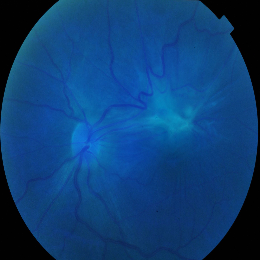

In [31]:
image

In [32]:
img=cv2.resize(img,(260,260))

In [33]:
img.shape

(260, 260, 3)

In [34]:
img=img[np.newaxis,...]

In [35]:
img.shape

(1, 260, 260, 3)

In [36]:
ans=model.predict(img)

In [37]:
ans

array([[7.5738120e-04, 1.8285015e-06, 1.9343341e-03, 4.7671364e-08,
        2.6812215e-05, 2.2334812e-04, 5.4640847e-04, 7.8598627e-05,
        2.2389139e-03, 2.2114765e-04, 2.1949690e-02, 3.0481522e-03,
        1.7601220e-04, 2.2889044e-05, 6.2100487e-03, 1.3804577e-02,
        3.0159315e-06, 1.3762552e-03, 1.2096248e-05, 1.9286634e-04,
        5.6850694e-02, 2.9699597e-05, 4.4141898e-06, 8.0930797e-04,
        6.0874620e-05, 6.9269478e-02, 1.8237818e-06, 2.4643183e-05,
        1.3750227e-04, 6.2565200e-02, 2.0332771e-05, 6.9635797e-01,
        3.9967271e-03, 6.4702632e-05, 4.6033822e-03, 3.4956355e-02,
        5.3330750e-04, 8.4446938e-08, 1.6889101e-02]], dtype=float32)

In [38]:
index=np.argmax(ans)

In [39]:
index

31

In [40]:
accuracy=round((np.amax(ans)*100),2)

In [41]:
print("There is a {a}% chance that {n} suffers from {d}".format(a=accuracy, n=name, d=labels[index-1]))

There is a 69.64% chance that Miss. Singhania suffers from Retinitis pigmentosa


In [42]:
import pickle

In [43]:
pickle.dump(model,open('Retinal Disease.pkl','wb'))

INFO:tensorflow:Assets written to: ram://281dc718-e74a-441c-85a7-3ebe80e312ad/assets


C:\Users\Aditi\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
C:\Users\Aditi\anaconda3\lib\site-packages\keras\saving\saved_model\layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


NotFoundError: 